<a href="https://colab.research.google.com/github/augustoputra/CSV-Transaction-Data-automatic-manipulation-/blob/main/CASE_1_WK_T_STATISTICS_FOR_BUSINESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#accessing googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statistics import mode
import matplotlib.ticker as ticker

In [ ]:
df = pd.read_csv('/content/drive/My Drive/googleplaystore.csv')

In [ ]:
#review data didalam table
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
#check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7723 non-null   int64  
 1   App             7723 non-null   object 
 2   Category        7723 non-null   object 
 3   Rating          7723 non-null   float64
 4   Reviews         7723 non-null   int64  
 5   Size            7723 non-null   object 
 6   Installs_plus   7723 non-null   int64  
 7   Type            7723 non-null   object 
 8   Price           7723 non-null   object 
 9   Content Rating  7723 non-null   object 
 10  Genres          7723 non-null   object 
 11  Last Updated    7723 non-null   object 
 12  Current Ver     7723 non-null   object 
 13  Android Ver     7723 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 844.8+ KB


In [ ]:
#check null values di data
df.isnull().sum()
#hasilnya tidak ada data yang null

,0
Unnamed: 0,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs_plus,0
Type,0
Price,0
Content Rating,0


In [ ]:
#show duplicate di app name right below
df_sorted = df.sort_values(by = 'App')
df_sorted[df_sorted.duplicated(subset = 'App', keep = False)]

#ternyara terdapat banyak data yang double



,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
953,1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
943,1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
1689,2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
1848,2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
1746,2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,1000,Paid,$16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,10000000,Free,0,Everyone 10+,Sports,25-Jul-18,6.17.2,4.4 and up
2145,3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,10000000,Free,0,Everyone 10+,Sports,25-Jul-18,6.17.2,4.4 and up
2115,2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,10000000,Free,0,Everyone 10+,Sports,25-Jul-18,6.17.2,4.4 and up
2528,3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,10000000,Free,0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device


In [ ]:
#delete row yang nama app nya sudah ada
df.drop_duplicates(subset = 'App', inplace = True)

In [ ]:
df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10832,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,23-Mar-14,0.8,2.2 and up
7719,10833,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
7720,10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
7721,10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up


In [ ]:
df.describe()

,Unnamed: 0,Rating,Reviews,Installs_plus
count,7023.000000,7023.000000,7.023000e+03,7.023000e+03
mean,5637.680906,4.160857,1.448921e+05,4.472096e+06
std,3078.940316,0.559246,1.024282e+06,2.714533e+07
min,0.000000,1.000000,1.000000e+00,1.000000e+00
25%,3086.500000,4.000000,8.400000e+01,1.000000e+04
50%,5715.000000,4.300000,1.550000e+03,1.000000e+05
75%,8290.500000,4.500000,2.662500e+04,1.000000e+06
max,10839.000000,5.000000,4.489172e+07,1.000000e+09


In [ ]:
#lihat category apa yg punya minimum rating
df_min_ratings = df[df['Rating'] == df['Rating'].min()]

In [ ]:
#buat list yang isinya catgory di df_min_ratings
df_min_ratings['Category'].unique()

array(['DATING', 'FAMILY', 'MEDICAL', 'GAME', 'FINANCE', 'PRODUCTIVITY',
       'COMMUNICATION', 'BUSINESS', 'TOOLS'], dtype=object)

In [ ]:
#lihat category apa yg punya maximum rating
df_max_ratings = df[df['Rating'] == df['Rating'].max()]

In [ ]:
#buat list yang isinya catgory di df_max_ratings
df_max_ratings['Category'].unique()

array(['COMICS', 'DATING', 'EVENTS', 'LIBRARIES_AND_DEMO', 'MEDICAL',
       'TOOLS', 'PERSONALIZATION', 'BOOKS_AND_REFERENCE', 'LIFESTYLE',
       'SOCIAL', 'BUSINESS', 'NEWS_AND_MAGAZINES', 'PHOTOGRAPHY',
       'SHOPPING', 'FAMILY', 'FOOD_AND_DRINK', 'GAME', 'TRAVEL_AND_LOCAL',
       'FINANCE', 'HEALTH_AND_FITNESS', 'COMMUNICATION', 'PRODUCTIVITY',
       'SPORTS', 'PARENTING', 'ART_AND_DESIGN'], dtype=object)

In [ ]:
#melihat perbandingan jumlah installasi per category, untuk paid maupun free apps
df2 = df.groupby(['Category', 'Type'])['Installs_plus'].sum().reset_index()
df2

,Category,Type,Installs_plus
0,ART_AND_DESIGN,Free,99212100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,43769800
3,BEAUTY,Free,13416200
4,BOOKS_AND_REFERENCE,Free,114766505
5,BOOKS_AND_REFERENCE,Paid,17650
6,BUSINESS,Free,386070360
7,BUSINESS,Paid,212560
8,COMICS,Free,17431100
9,COMMUNICATION,Free,1817666530


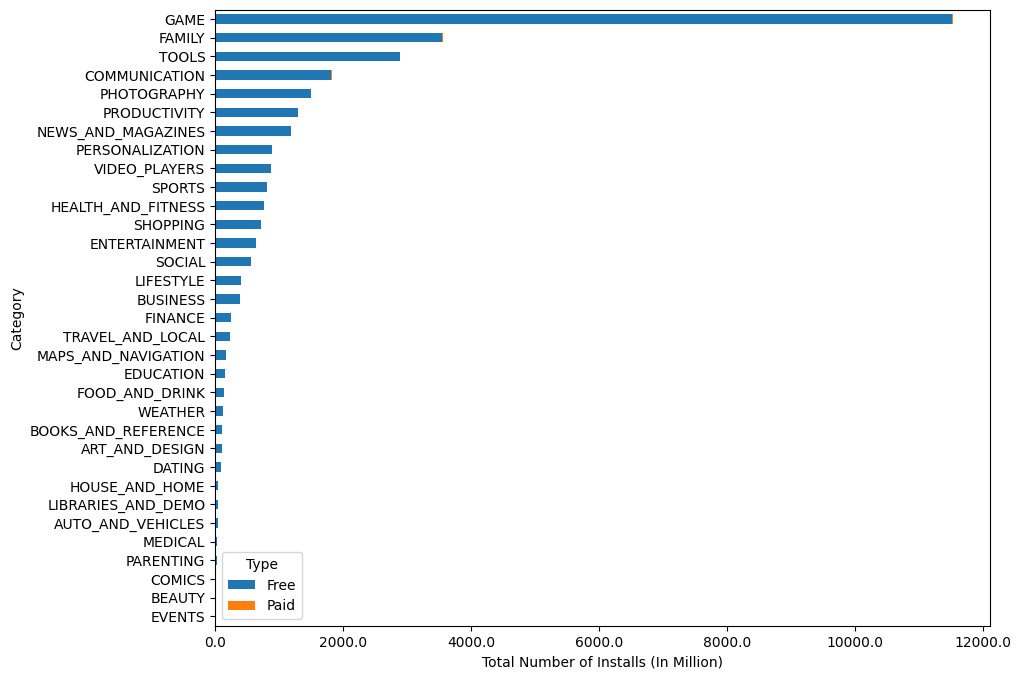

In [ ]:
df2_pivot = df2.pivot(index='Category', columns='Type', values='Installs_plus')



df2_pivot = df2_pivot.sort_values(by = 'Free', ascending = True)
fig, ax = plt.subplots(figsize=(10, 8))
df2_pivot.plot(kind = 'barh', stacked = True, ax=ax)
plt.xlabel('Total Number of Installs (In Million)')
plt.ylabel('Category')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x/1000000)))
plt.show()

**Dari data di atas, terlihat bahwa total number install untuk kategori games (terutama yg free) itu nilainya tinggi sekali,maka dari itu di grafik bawah akan mengecek apabila ada outlier dari histogram data number of installation di group by aplikasi**

In [ ]:
df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10832,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,23-Mar-14,0.8,2.2 and up
7719,10833,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
7720,10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
7721,10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up


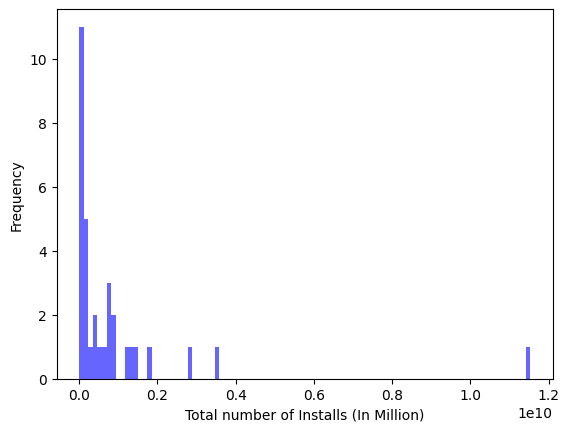

In [ ]:
#cek histogram plot installs
data = df.groupby(['Category'])['Installs_plus'].sum()
plt.hist(data, bins=100, alpha=0.6, color='b')

#x label
plt.xlabel('Total number of Installs (In Million)')
#y label
plt.ylabel('Frequency')
plt.show()

In [ ]:
#check catgory
data.sort_values(ascending = False)

,Installs_plus
Category,
GAME,11532352717
FAMILY,3552661580
TOOLS,2889553500
COMMUNICATION,1817915530
PHOTOGRAPHY,1493893130
PRODUCTIVITY,1296302080
NEWS_AND_MAGAZINES,1190900550
PERSONALIZATION,895131930
VIDEO_PLAYERS,866662200


In [ ]:
#cek histogram plot installs
df_game = df[df['Category'] == 'GAME']


In [ ]:
df_game.sort_values(by = 'Installs_plus', ascending = False)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1137,1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up
1138,1655,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
1143,1661,Temple Run 2,GAME,4.3,8118609,62M,500000000,Free,0,Everyone,Action,5-Jul-18,1.49.1,4.0 and up
1144,1662,Pou,GAME,4.3,10485308,24M,500000000,Free,0,Everyone,Casual,25-May-18,1.4.77,4.0 and up
1229,1773,Extreme Car Driving Simulator,GAME,4.3,2251012,52M,100000000,Free,0,Everyone,Racing,3-May-18,4.17.2,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,7475,211:CK Lite,GAME,4.3,3,39M,10,Free,0,Mature 17+,Action,22-Sep-17,1,4.1 and up
5261,7466,211:CK,GAME,5.0,8,38M,10,Paid,$0.99,Teen,Arcade,11-Apr-18,1.3,4.1 and up
4776,6700,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0,Everyone,Arcade,23-Jul-18,1,4.1 and up
7630,10696,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


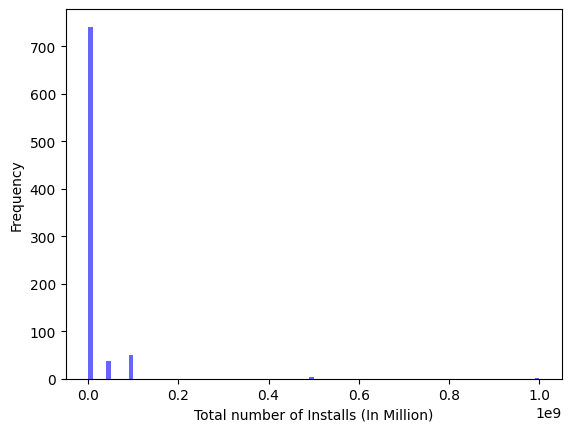

In [ ]:
#see the distribution of number of install in df_game across apps
data = df_game.groupby(['App'])['Installs_plus'].sum()
plt.hist(data, bins=100, alpha=0.6, color='b')

#x label
plt.xlabel('Total number of Installs (In Million)')
#y label
plt.ylabel('Frequency')
plt.show()

**dapat dilihat bahwa terdapat nilai installasi aplikasi yang maximum hinggan 1 milliar jumlah instalasi, kita akan lihat dari mana aplikasi ini berasal**

In [ ]:
df.loc[(df['Installs_plus'] == df['Installs_plus'].max()) ]


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1137,1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up
2578,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0,Teen,News & Magazines,1-Aug-18,5.2.0,4.4 and up


Ketika melihat data di bawah, terdapat lonjakan jumlah instalasi dari 1 miliar, diikuti oleh penurunan drastis ke sekitar 500 juta. Dalam konteks ini, saya mengasumsikan bahwa outlier tersebut bersifat alami, dengan mempertimbangkan bahwa aplikasi Subway Surfer mengalami popularitas luar biasa, terutama pada periode 2013 hingga 2014, sehingga jika distribusi instalasi menunjukkan skewness adalah hal yang wajar

In [ ]:
df.sort_values(by = 'Installs_plus', ascending = False).head(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1137,1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up
2578,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0,Teen,News & Magazines,1-Aug-18,5.2.0,4.4 and up
2285,3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17M,500000000,Free,0,Everyone,Tools,30-Jul-18,4.5.28_ww,4.1 and up
1144,1662,Pou,GAME,4.3,10485308,24M,500000000,Free,0,Everyone,Casual,25-May-18,1.4.77,4.0 and up
1143,1661,Temple Run 2,GAME,4.3,8118609,62M,500000000,Free,0,Everyone,Action,5-Jul-18,1.49.1,4.0 and up
269,378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,500000000,Free,0,Teen,Communication,2-Aug-18,12.8.5.1121,4.0 and up
3988,5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70M,500000000,Free,0,Everyone,Health & Fitness,31-Jul-18,5.17.2.009,5.0 and up
1138,1655,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
255,347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11M,500000000,Free,0,Everyone,Communication,8-Jun-18,9.8.000000010501,4.0 and up
2431,3473,Dropbox,PRODUCTIVITY,4.4,1861310,61M,500000000,Free,0,Everyone,Productivity,1-Aug-18,Varies with device,Varies with device


In [ ]:
#check app with last updated paling lama
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7023 entries, 0 to 7722
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7023 non-null   int64  
 1   App             7023 non-null   object 
 2   Category        7023 non-null   object 
 3   Rating          7023 non-null   float64
 4   Reviews         7023 non-null   int64  
 5   Size            7023 non-null   object 
 6   Installs_plus   7023 non-null   int64  
 7   Type            7023 non-null   object 
 8   Price           7023 non-null   object 
 9   Content Rating  7023 non-null   object 
 10  Genres          7023 non-null   object 
 11  Last Updated    7023 non-null   object 
 12  Current Ver     7023 non-null   object 
 13  Android Ver     7023 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.1+ MB


In [ ]:
#sekarang, kita akan melihat number of apps installed untuk yang paid only
df3 = df.groupby(['Category', 'Type'])['Installs_plus'].sum().reset_index()
df3 = df3[df3['Type'] == 'Paid']
df3

,Category,Type,Installs_plus
1,ART_AND_DESIGN,Paid,16000
5,BOOKS_AND_REFERENCE,Paid,17650
7,BUSINESS,Paid,212560
10,COMMUNICATION,Paid,249000
12,DATING,Paid,1100
14,EDUCATION,Paid,602000
16,ENTERTAINMENT,Paid,100000
19,FAMILY,Paid,10170830
21,FINANCE,Paid,185600
23,FOOD_AND_DRINK,Paid,50000


<ipython-input-27-f447c7259e8e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'Category', x = 'Installs_plus', data = df3.sort_values(by = 'Installs_plus', ascending = False), palette = 'viridis')


<Axes: xlabel='Installs_plus', ylabel='Category'>

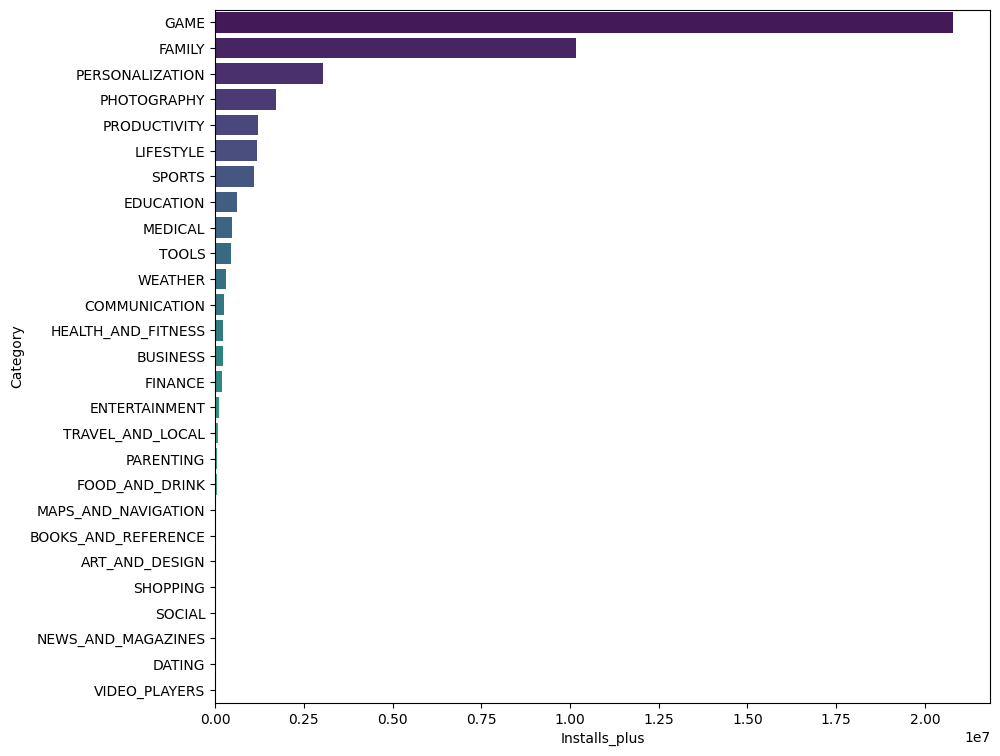

In [ ]:
#plotting untuk df3 (number of installed tiap category)
plt.figure(figsize = (10, 9))
sns.barplot(y = 'Category', x = 'Installs_plus', data = df3.sort_values(by = 'Installs_plus', ascending = False), palette = 'viridis')


In [ ]:
#plot category and mean dari rating dalam boxplot

df_type_ratings = df.groupby(['Type'])['Rating'].median()
df_type_ratings

,Rating
Type,
Free,4.3
Paid,4.4


<ipython-input-29-b4eb5c0c2219>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Type', y = 'Rating', data = df_type_ratings.reset_index(), palette = 'viridis')
<ipython-input-29-b4eb5c0c2219>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, df_type_ratings[i], round(df_type_ratings[i], 2), ha = 'center')


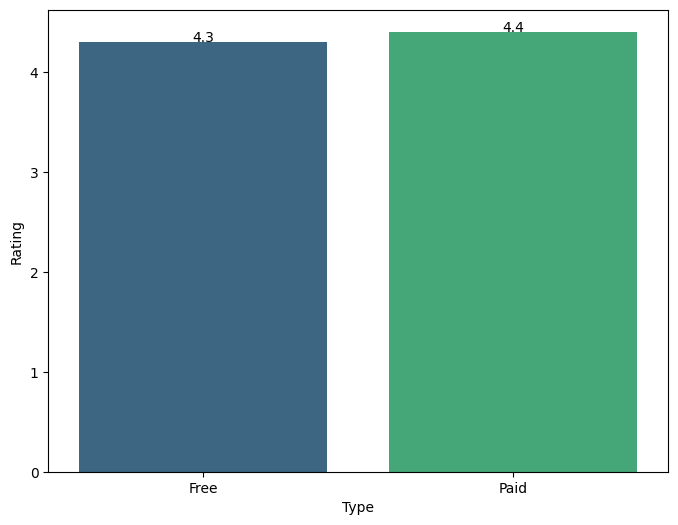

In [ ]:
#plot df_category_ratings
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Type', y = 'Rating', data = df_type_ratings.reset_index(), palette = 'viridis')
#add value label to both graph
for i in range(len(df_type_ratings)):
  plt.text(i, df_type_ratings[i], round(df_type_ratings[i], 2), ha = 'center')

<Axes: xlabel='Rating', ylabel='Count'>

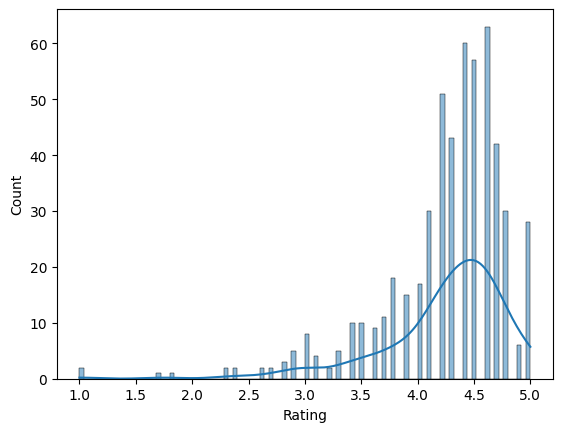

In [ ]:
#plot distribution df['Rating'].loc[df['Type'] == 'Paid']
sns.histplot(df['Rating'].loc[df['Type'] == 'Paid'], bins = 100, kde = True)

<Axes: xlabel='Rating', ylabel='Count'>

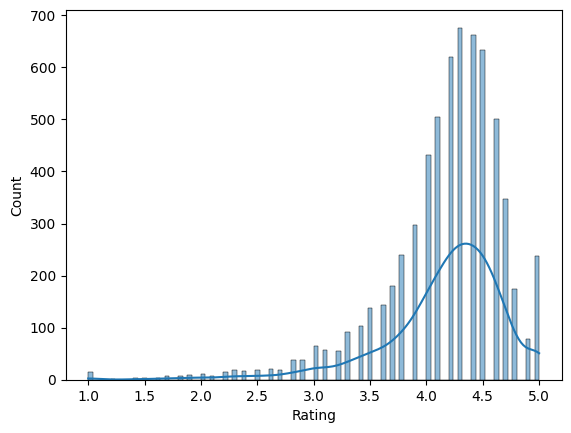

In [ ]:
#plot distribution df['Rating'].loc[df['Type'] == 'Free']
sns.histplot(df['Rating'].loc[df['Type'] == 'Free'], bins = 100, kde = True)

In [ ]:
#plot mean dari rating per category dengan categorynya masing masing
plt.figure(figsize = (10, 9))
sns.barplot(y = 'Category', x = 'Rating', data = df_category_ratings.sort_values(by = 'Rating', ascending = False), hue = 'Category', palette = 'viridis')
#set min x scale
plt.xlim(1, 5)

NameError: name 'df_category_ratings' is not defined

<Figure size 1000x900 with 0 Axes>

In [ ]:
df.groupby(['Type'])['Rating'].mean().reset_index()

,Type,Rating
0,Free,4.153886
1,Paid,4.244712


In [ ]:
df_paid =df[df['Type'] == 'Paid']

In [ ]:

#change data type in price
df_paid['Price'] = df_paid['Price'].str.replace('$', '')


<ipython-input-39-463bea69e5b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paid['Price'] = df_paid['Price'].str.replace('$', '')


In [ ]:
#change price data type to na number
df_paid['Price'] = pd.to_numeric(df_paid['Price'], errors = 'coerce')

<ipython-input-40-4c33a1866faf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paid['Price'] = pd.to_numeric(df_paid['Price'], errors = 'coerce')


In [ ]:
#check null di rating
df_paid['Rating'].isnull().sum()
df_paid['Price'].max()

400.0

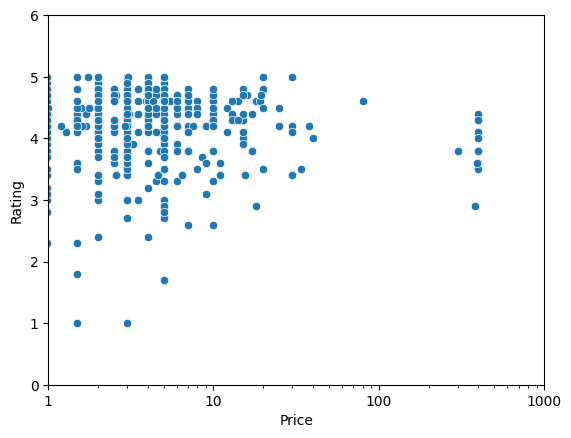

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatter

sns.scatterplot(x = 'Price', y = 'Rating', data = df_paid)

#xcale to be in range
plt.xscale('log')

plt.xlim(1, 1000)
plt.ylim(0, 6)
ax = plt.gca()

ax.xaxis.set_major_locator(LogLocator(base = 10, numticks = 10))
ax.xaxis.set_major_formatter(LogFormatter(base = 10))


plt.show()

In [ ]:
df_paid.loc[(df_paid['Price'] >= 100) & (df_paid['Price'] <= 300)]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3796,5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,21-Jul-18,1.1.1,4.3 and up


<Axes: xlabel='Price', ylabel='Count'>

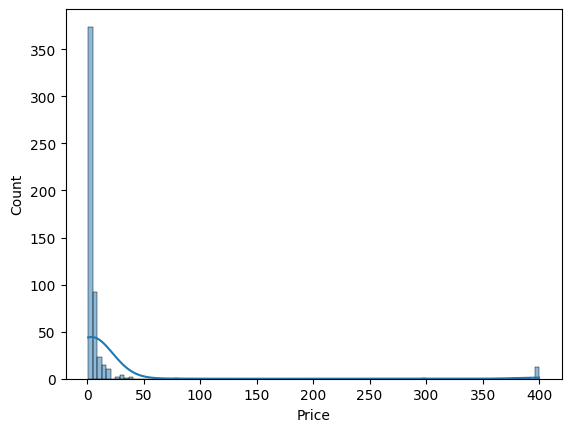

In [ ]:
df_paid['Price'].describe()

#plot the price
sns.histplot(df_paid['Price'], bins = 100, kde = True)

In [ ]:
 df_paid[['Price', 'Rating']].corr(method='kendall')

,Price,Rating
Price,1.000000,-0.076177
Rating,-0.076177,1.000000


In [ ]:
df_size_rating = df[['Size', 'Rating']]

In [ ]:
df_size_rating

,Size,Rating
0,19M,4.1
1,14M,3.9
2,8.7M,4.7
3,25M,4.5
4,2.8M,4.3
...,...,...
7718,619k,4.8
7719,2.6M,4.0
7720,53M,4.5
7721,3.6M,5.0


In [ ]:
df_size_rating['Size'] = df_size_rating['Size'].apply(lambda x: float(x[:-1]) * 1000 if x[-1] == 'k' else (float(x[:-1]) * 1000000 if x[-1] == 'M' else x))


<ipython-input-48-1040b1f14051>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size_rating['Size'] = df_size_rating['Size'].apply(lambda x: float(x[:-1]) * 1000 if x[-1] == 'k' else (float(x[:-1]) * 1000000 if x[-1] == 'M' else x))


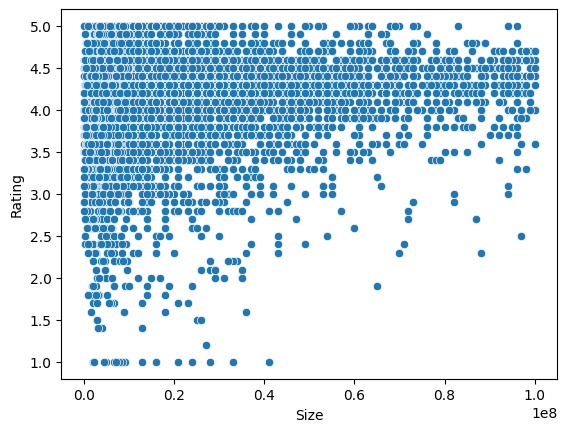

In [ ]:
#plot df_size_rating
sns.scatterplot(x = 'Size', y = 'Rating', data = df_size_rating)





ax.xaxis.set_major_locator(LogLocator(base = 10, numticks = 10))
ax.xaxis.set_major_formatter(LogFormatter(base = 10))



plt.show()

In [ ]:
#data correlation
df_size_rating.corr()

,Size,Rating
Size,1.000000,0.062744
Rating,0.062744,1.000000


In [ ]:
df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10832,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,23-Mar-14,0.8,2.2 and up
7719,10833,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
7720,10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
7721,10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up


In [ ]:
#ubah data size supaya k jadi 1000 dan M jadi 1000000
df['Size'] = df['Size'].apply(lambda x: float(x[:-1]) * 1000 if x[-1] == 'k' else (float(x[:-1]) * 1000000 if x[-1] == 'M' else x))

In [ ]:
#ubah data price supaya symbol dollar hilang dan jadi tipe data float
df['Price'] = df['Price'].apply(lambda x: float(x[1:]) if x[0] == '$' else x)
#change price to numeric data
df['Price'] = df['Price'].astype(float)

In [ ]:
df_game = df[(df['Category']== 'GAME') & (df['Type'] == 'Paid')]
df_family = df[(df['Category']== 'FAMILY') & (df['Type'] == 'Paid')]
df_tools = df[(df['Category']== 'TOOLS') & (df['Type'] == 'Paid')]

In [ ]:
df_game[['Price', 'Size']].describe()


,Price,Size
count,75.000000,7.500000e+01
mean,3.658400,3.529600e+07
std,3.320427,2.718160e+07
min,0.990000,1.300000e+06
25%,0.990000,1.450000e+07
50%,2.990000,2.900000e+07
75%,4.990000,4.750000e+07
max,17.990000,1.000000e+08


<Axes: xlabel='Price', ylabel='Count'>

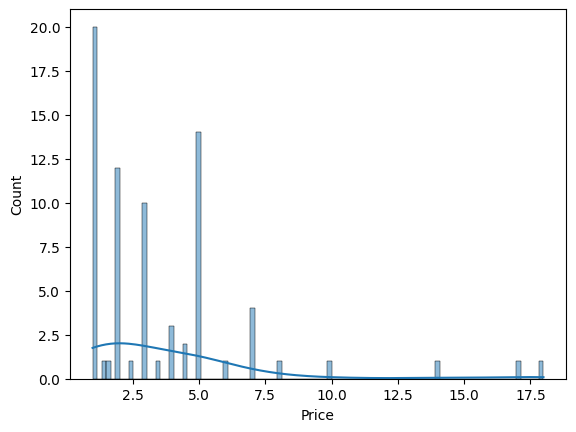

In [ ]:
#plot histogram
sns.histplot(df_game['Price'], bins = 100, kde = True)


In [ ]:
df_family[['Price', 'Size']].describe()

,Price,Size
count,150.000000,1.500000e+02
mean,14.975733,2.831665e+07
std,63.677671,2.385236e+07
min,0.990000,1.400000e+04
25%,2.490000,8.750000e+06
50%,2.990000,2.150000e+07
75%,4.990000,4.375000e+07
max,399.990000,9.600000e+07


<Axes: xlabel='Price', ylabel='Count'>

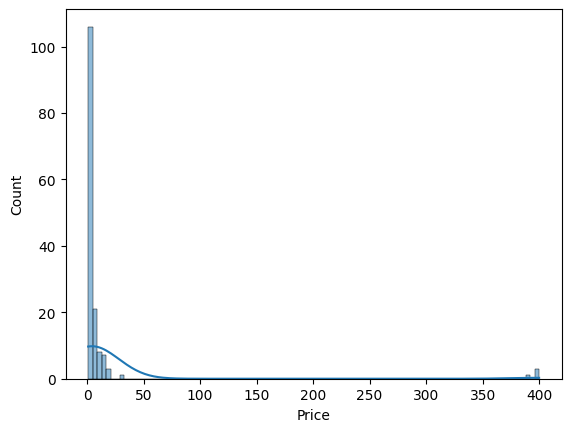

In [ ]:
#histogram plot
sns.histplot(df_family['Price'], bins = 100, kde = True)

In [ ]:
df_tools[['Price', 'Size']].describe()

,Price,Size
count,55.000000,5.500000e+01
mean,3.338182,3.701655e+06
std,2.759964,6.796003e+06
min,0.990000,2.500000e+04
25%,1.490000,6.915000e+05
50%,2.990000,2.000000e+06
75%,4.740000,3.300000e+06
max,14.990000,3.500000e+07


<Axes: xlabel='Price', ylabel='Count'>

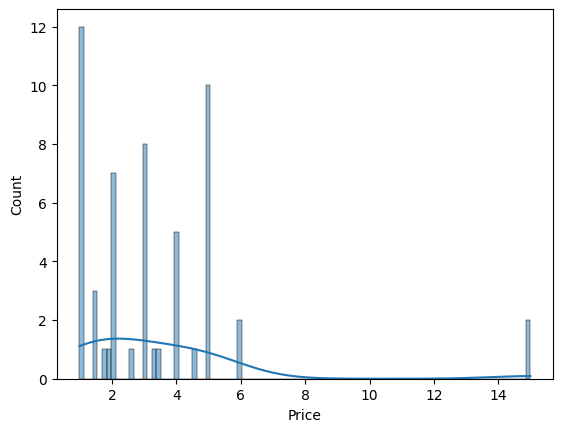

In [ ]:
#histogram plot
sns.histplot(df_tools['Price'], bins = 100, kde = True)

In [ ]:
df_game

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1278,1831,The Game of Life,GAME,4.4,18621,63000000.0,100000,Paid,2.99,Everyone,Board,4-Jul-18,2.1.2,4.4 and up
1279,1832,Clue,GAME,4.6,19922,35000000.0,100000,Paid,1.99,Everyone 10+,Board,30-Jul-18,2.2.5,5.0 and up
1280,1833,The Room: Old Sins,GAME,4.9,21119,48000000.0,100000,Paid,4.99,Everyone,Puzzle,18-Apr-18,1.0.1,4.4 and up
1281,1834,The Escapists,GAME,4.4,7412,84000000.0,100000,Paid,4.99,Teen,Strategy,26-Apr-18,1.1.0,2.3 and up
1282,1835,Farming Simulator 18,GAME,4.5,18125,15000000.0,100000,Paid,4.99,Everyone,Simulation;Education,9-Jul-18,Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,10060,An Elite Warrior Ex,GAME,4.7,15,93000000.0,100,Paid,0.99,Everyone,Adventure,21-Nov-16,1.59,4.0.3 and up
7347,10270,Galaxian(FC),GAME,4.5,2,7800000.0,100,Paid,1.99,Everyone,Arcade,13-Nov-15,1,2.3 and up
7620,10681,Fruit Ninja Classic,GAME,4.3,85468,36000000.0,1000000,Paid,0.99,Everyone,Arcade,8-Jun-18,2.4.1.485300,4.0.3 and up
7630,10696,Mu.F.O.,GAME,5.0,2,16000000.0,1,Paid,0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


In [ ]:
df_game['Genres'].unique()

array(['Board', 'Puzzle', 'Strategy', 'Simulation;Education',
       'Simulation', 'Action', 'Role Playing', 'Arcade', 'Adventure',
       'Card', 'Casino', 'Music', 'Racing'], dtype=object)

In [ ]:
df_game_high_rating = df_game[(df_game['Rating'] >= 4) & (df_game['Rating'] <= 5)]
df_game_high_rating

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs_plus,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1278,1831,The Game of Life,GAME,4.4,18621,63000000.0,100000,Paid,2.99,Everyone,Board,4-Jul-18,2.1.2,4.4 and up
1279,1832,Clue,GAME,4.6,19922,35000000.0,100000,Paid,1.99,Everyone 10+,Board,30-Jul-18,2.2.5,5.0 and up
1280,1833,The Room: Old Sins,GAME,4.9,21119,48000000.0,100000,Paid,4.99,Everyone,Puzzle,18-Apr-18,1.0.1,4.4 and up
1281,1834,The Escapists,GAME,4.4,7412,84000000.0,100000,Paid,4.99,Teen,Strategy,26-Apr-18,1.1.0,2.3 and up
1282,1835,Farming Simulator 18,GAME,4.5,18125,15000000.0,100000,Paid,4.99,Everyone,Simulation;Education,9-Jul-18,Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,9710,Superbrothers Sword & Sworcery,GAME,4.4,11023,16000000.0,100000,Paid,3.99,Teen,Adventure,26-Jan-18,1.0.20,2.3 and up
7186,10060,An Elite Warrior Ex,GAME,4.7,15,93000000.0,100,Paid,0.99,Everyone,Adventure,21-Nov-16,1.59,4.0.3 and up
7347,10270,Galaxian(FC),GAME,4.5,2,7800000.0,100,Paid,1.99,Everyone,Arcade,13-Nov-15,1,2.3 and up
7620,10681,Fruit Ninja Classic,GAME,4.3,85468,36000000.0,1000000,Paid,0.99,Everyone,Arcade,8-Jun-18,2.4.1.485300,4.0.3 and up


<Axes: xlabel='Price', ylabel='Count'>

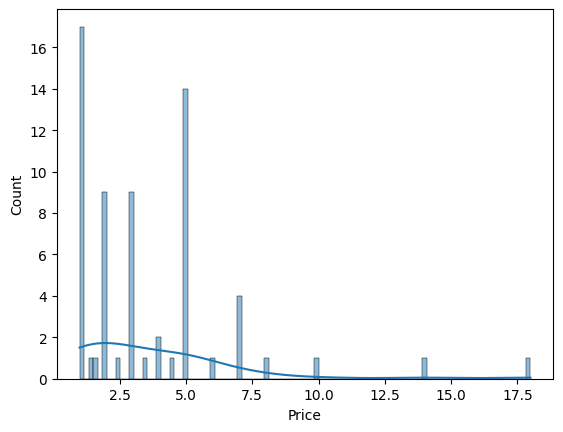

In [ ]:
sns.histplot(df_game_high_rating['Price'], bins = 100, kde = True)

<Axes: xlabel='Size', ylabel='Count'>

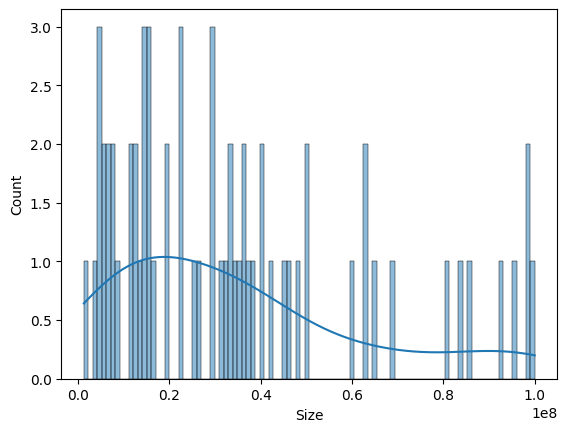

In [ ]:
sns.histplot(df_game_high_rating['Size'], bins = 100, kde = True)

In [ ]:
df_game_high_rating[['Size', 'Price','Rating']].describe()

,Size,Price,Rating
count,6.500000e+01,65.000000,65.000000
mean,3.467077e+07,3.645846,4.470769
std,2.750883e+07,3.080092,0.240262
min,1.300000e+06,0.990000,4.000000
25%,1.400000e+07,0.990000,4.300000
50%,2.900000e+07,2.990000,4.500000
75%,4.600000e+07,4.990000,4.600000
max,1.000000e+08,17.990000,5.000000
